<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

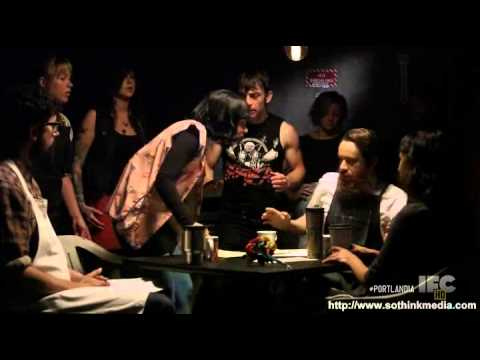

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs') 

In [2]:
%pwd

'/Users/stevenchase/Desktop/Steven/Computer_Science/Lambda/DS_Unit_4_Sprint_1_NLP/module1-text-data'

In [28]:
# Import dataset

import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


#### Clean data

In [29]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [30]:
# Keep only the numeric rating
shops['star_rating']= shops['star_rating'].str.split('.').str[0]

In [31]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5


In [33]:
# Drop the dates from the full review
# Drop by dropping the first 11 characters because they all have dates saved at the begining of the string
shops['full_review_text'] = shops['full_review_text'].str[11:]

In [38]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [40]:
# Analyze the cafe reviews using Spacy

# Import spacy
import spacy
from spacy.tokenizer import Tokenizer

# Set natural language processor model to use
nlp = spacy.load("en_core_web_lg")

# Define Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [41]:
# Tokenizer Pipe

tokens = []

# Convert full review text to tokens

for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [42]:
# Look at head of tokens
# See what we need to do to clean it further
shops['tokens'].head()

0    [ , 1, check-in, Love, love, loved, the, atmos...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [ , 1, check-in, Listed, in, Brunch, Spots, I,...
3    [ , Very, cool, decor!, Good, drinks, Nice, se...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [45]:
# Remove stop words
# Starting with Spacy's default stop words

tokens = []

# Update tokens column to those not in stop words or punctuation, also make all lowercase

for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [47]:
# Look at head of tokens
# See what we need to do to clean it further
shops.tokens.head()

0    [ , 1, check-in, love, love, loved, atmosphere...
1    [listed, date, night:, austin,, ambiance, aust...
2    [ , 1, check-in, listed, brunch, spots, loved,...
3    [ , cool, decor!, good, drinks, nice, seating,...
4    [1, check-in, located, northcross, mall, shopp...
Name: tokens, dtype: object

In [63]:
# Add my own stop words to the list
# Remove the check-in data
# Remove whitespaces

STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'check', 'check-in', 'check-ins', '1', '2', '3', '4' '5', '6', '7', 'listed'])


In [49]:
# Update token list to remove my custom stop words

tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
shops['tokens'] = tokens

In [59]:
# Look at head of tokens
# See what we need to do to clean it further

shops['tokens'].head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [date, night:, austin,, ambiance, austin, beau...
2    [brunch, spots, loved, eclectic, homey, plush,...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

#### Perform Lemmatization

In [60]:
# Define get_lemmas function
# Use customized stop words list saved as STOP_WORDS - from above

def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [65]:
# Use get_lemmas function
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [66]:
# Look at head to see if we should clean further

shops['lemmas'].head()

0    [Love, love, love, atmosphere, corner, coffee,...
1    [Date, Night, Austin, Ambiance, Austin, beauti...
2    [Brunch, Spots, love, eclectic, homey, plush, ...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

In [52]:
# Function to count the instances of each token

from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [54]:
# Counts of each lemma
wc = count(shops['lemmas'])
wc.head()

#### Top 30 words (lemmas) in the reviews overall

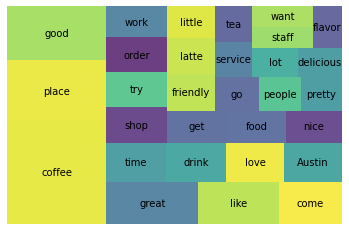

In [69]:
# Visual to look at the top 30 lemmas overall
import squarify
import matplotlib.pyplot as plt

# Get list of top 30 lemmas
wc = count(shops['lemmas'])
wc_top30 = wc[wc['rank'] <= 30]

# Plot visual
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

#### Produce top 30 words visual for good rating (rating of 4 or 5)

In [91]:
# Star rating has a leading white space
shops['star_rating'] = shops['star_rating'].str.strip()

In [100]:
# Convert to integers
shops['star_rating'] = shops['star_rating'].astype(str).astype(int)

In [105]:
# Create subset of good ratings (those with rating over )

good_rating = shops[shops['star_rating'] > 3]
good_rating.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[love, love, loved, atmosphere!, corner, coffe...","[Love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,"[date, night:, austin,, ambiance, austin, beau...","[Date, Night, Austin, Ambiance, Austin, beauti..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[brunch, spots, loved, eclectic, homey, plush,...","[Brunch, Spots, love, eclectic, homey, plush, ..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the m...,4,"[cute, cafe!, think, moment, stepped, in,, was...","[cute, cafe, think, moment, step, find, cute, ..."


In [108]:
# Lemmatization for good ratings

good_rating['lemmas'] = good_rating['full_review_text'].apply(get_lemmas)
good_rating['lemmas'].head()

/Users/stevenchase/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    [Love, love, love, atmosphere, corner, coffee,...
1    [Date, Night, Austin, Ambiance, Austin, beauti...
2    [Brunch, Spots, love, eclectic, homey, plush, ...
4    [locate, Northcross, mall, shopping, center, f...
5    [cute, cafe, think, moment, step, find, cute, ...
Name: lemmas, dtype: object

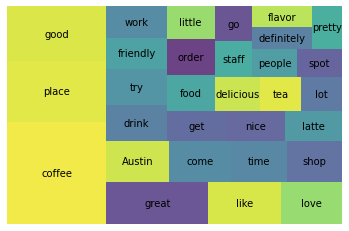

In [109]:
# Visual to look at the top 30 lemmas for good rating
import squarify
import matplotlib.pyplot as plt

# Get list of top 30 lemmas
wc = count(good_rating['lemmas'])
wc_top30 = wc[wc['rank'] <= 30]

# Plot visual
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

#### Produce top 30 words visual for bad rating (rating of below 4)

In [107]:
# Subset of bad ratings
bad_rating = shops[shops['star_rating'] < 4]
bad_rating.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pr...",3,"[ok,, let's, try, approach..., pros:, music, s...","[ok, let, try, approach, pro, music, Seating, ..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, th...",3,"[store, a+, decoration,, honestly,, coffee, go...","[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is...,3,"[2016, -, time, charm!, factory, a+, decor, in...","[2016, time, Charm, Factory, a+, decor, innova..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1,"[okay,, visiting, friends, la, trying, mint, m...","[okay, visit, friend, LA, try, mint, mojito, i..."


In [110]:
# Lemmatization for bad ratings

bad_rating['lemmas'] = bad_rating['full_review_text'].apply(get_lemmas)
bad_rating['lemmas'].head()

/Users/stevenchase/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3     [cool, decor, good, drink, nice, seating, over...
8     [ok, let, try, approach, pro, music, Seating, ...
11    [store, a+, decoration, honestly, coffee, good...
12    [2016, time, Charm, Factory, a+, decor, innova...
25    [okay, visit, friend, LA, try, mint, mojito, i...
Name: lemmas, dtype: object

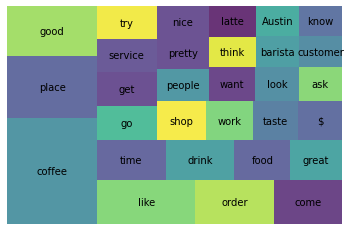

In [111]:
# Visual to look at the top 30 lemmas for bad rating
import squarify
import matplotlib.pyplot as plt

# Get list of top 30 lemmas
wc = count(bad_rating['lemmas'])
wc_top30 = wc[wc['rank'] <= 30]

# Plot visual
squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [139]:
# Count the lemmas in both good and bad ratings
# Subtract the pct_total to get the difference
# Graph the top 10 words

# Good ratings count
wc_good = count(good_rating['lemmas'])
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1939,,156,214,247.0,0.000773,0.537349,0.025407
1376,,278,391,123.0,0.001413,0.414253,0.045277
4935,,11,16,1988.0,0.000058,0.868930,0.001792
55,$,394,553,83.0,0.001998,0.345996,0.064169
447,+,108,255,194.0,0.000921,0.493179,0.017590


In [126]:
# Bad ratings count
wc_bad = count(bad_rating['lemmas'])
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7158,éclair,1,1,7218.0,0.000013,0.994759,0.000678
6792,°,1,1,6908.0,0.000013,0.990778,0.000678
3594,~really,1,1,4900.0,0.000013,0.964986,0.000678
3589,~ample,1,1,4899.0,0.000013,0.964973,0.000678
6204,~20,1,1,6455.0,0.000013,0.984959,0.000678


In [180]:
# Create bad percent table and good percent table

bad_percent = wc_bad[['pct_total', 'word']]
good_percent = wc_good[['pct_total', 'word']]

# Merge them together on an outer join on the key 'word'

df = pd.merge(good_percent, bad_percent, how= 'outer', on= 'word', suffixes= ('_good', '_bad'))
df.head()

,pct_total_good,word,pct_total_bad
0,0.000773,,0.001015
1,0.001413,,0.001529
2,0.000058,,0.000013
3,0.001998,$,0.004894
4,0.000921,+,0.000591


In [181]:
# Replace NaN with zero

import numpy as np
df = df.fillna(0)
df.head()

,pct_total_good,word,pct_total_bad
0,0.000773,,0.001015
1,0.001413,,0.001529
2,0.000058,,0.000013
3,0.001998,$,0.004894
4,0.000921,+,0.000591


In [182]:
# Create difference column
df['difference'] = (df['pct_total_good'] - df['pct_total_bad'])
df.head()

,pct_total_good,word,pct_total_bad,difference
0,0.000773,,0.001015,-0.000242
1,0.001413,,0.001529,-0.000116
2,0.000058,,0.000013,0.000045
3,0.001998,$,0.004894,-0.002896
4,0.000921,+,0.000591,0.000330


In [183]:
# Sort top ten difference
df = df.sort_values(by= ['difference'], ascending = False)
top_ten_diff = df.head(10)
top_ten_diff

,pct_total_good,word,pct_total_bad,difference
1192,0.012331,great,0.005908,0.006422
1470,0.007432,love,0.003121,0.004310
52,0.007182,Austin,0.003699,0.003483
886,0.004393,delicious,0.001092,0.003301
1175,0.015607,good,0.012806,0.002801
1131,0.005459,friendly,0.002685,0.002774
413,0.002800,amazing,0.000642,0.002158
1066,0.002771,favorite,0.000732,0.002039
1730,0.002518,perfect,0.000539,0.001979
715,0.028968,coffee,0.027012,0.001956


#### Top ten different words used in good ratings

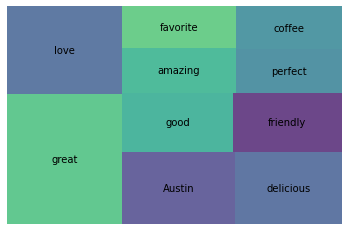

In [184]:
# Visual top ten different words used in good ratings

squarify.plot(sizes=top_ten_diff['difference'], label=top_ten_diff['word'], alpha=.8 )
plt.axis('off')
plt.show()

#### Top ten different words used in bad ratings

In [177]:
# Sort bottom ten difference

df = df.sort_values(by= ['difference'], ascending = False)
bottom_ten_diff = df.tail(10)
bottom_ten_diff

,pct_total_good,word,pct_total_bad,difference
1171,0.003736,go,0.005780,-0.002044
2227,0.002811,taste,0.004958,-0.002147
483,0.000874,bad,0.003031,-0.002157
1981,0.001192,say,0.003429,-0.002237
2018,0.003259,service,0.005600,-0.002341
846,0.001120,customer,0.003776,-0.002656
3,0.001998,$,0.004894,-0.002896
449,0.001250,ask,0.004174,-0.002924
1436,0.008794,like,0.012125,-0.003332
1659,0.004950,order,0.009749,-0.004799


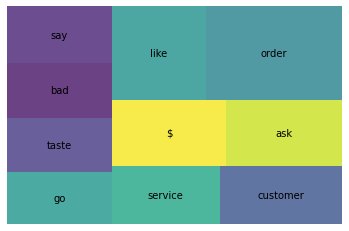

In [178]:
# Visual of top ten words used more in bad ratings

squarify.plot(sizes=bottom_ten_diff['difference'], label=bottom_ten_diff['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

